In [24]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [25]:
x_train = x_train/255.0
x_test = x_test/255.0

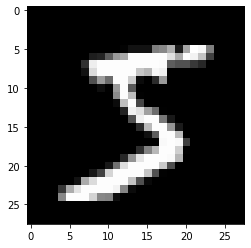

In [26]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray")

In [27]:
x_train[0].shape

(28, 28)

### Creating Encoder and Decoder


In [28]:
#Encoder
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(25, activation="relu")(x)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

#Decoder
decoder_input = keras.layers.Dense(25, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

#Optimizer
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

#Autoencoder
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

autoencoder.compile(opt, loss='mse')
epochs=3

for epoch in range(epochs):
    history = autoencoder.fit(
      x_train,
      x_train,
      epochs=1, 
      batch_size=64, validation_split=0.10
        ) 

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 25)                19625     
_________________________________________________________________
dense_7 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_8 (Dense)              (None, 784)               20384     
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
Total params: 40,659
Trainable params: 40,659
Non-trainable params: 0
___________________________________________________

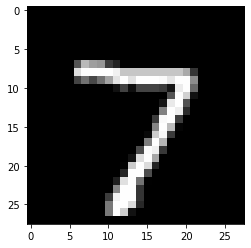

In [29]:
plt.imshow(x_test[0], cmap="gray")

In [30]:
example = encoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])

print(example[0].shape)

(25,)


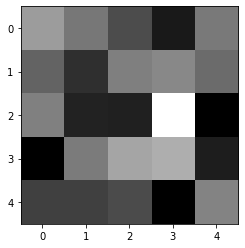

In [31]:
plt.imshow(example[0].reshape((5,5)), cmap="gray")

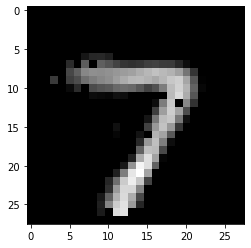

In [32]:
ae_out = autoencoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
plt.imshow(ae_out[0].reshape((28,28)),cmap="gray")

### Adding Noise and Denoising

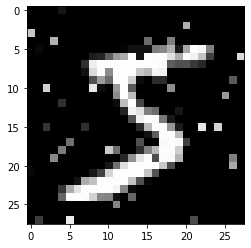

In [33]:
import random


def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

noisy = add_noise(x_train[0])
plt.imshow(noisy, cmap="gray")


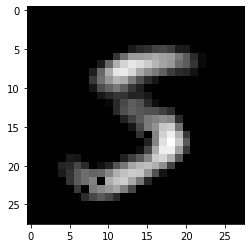

In [34]:
ae_out = autoencoder.predict([ noisy.reshape(-1, 28, 28, 1) ])
img = ae_out[0]  
plt.imshow(ae_out[0].reshape((28,28)), cmap="gray")